In [1]:
import os.path
import collections
from src import utils
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
b2_files = {
    "aerobic": [
        ("samples/b2/images/lena.png", "samples/b2/compressed/lena.aerobic", "samples/b2/decompressed/aerobic_lena.png"),
        ("samples/b2/images/baboon.png", "samples/b2/compressed/baboon.aerobic", "samples/b2/decompressed/aerobic_baboon.png"),
        ("samples/b2/images/peppers.png", "samples/b2/compressed/peppers.aerobic", "samples/b2/decompressed/aerobic_peppers.png")
    ],
    "jpeg": [
        ("samples/b2/images/lena.png", "samples/b2/compressed/lena.jpg", "samples/b2/decompressed/lena.png"),
        ("samples/b2/images/baboon.png", "samples/b2/compressed/baboon.jpg", "samples/b2/decompressed/baboon.png"),
        ("samples/b2/images/peppers.png", "samples/b2/compressed/peppers.jpg", "samples/b2/decompressed/peppers.png")
    ]
}

b8_files = {
    "aerobic": [
        ("samples/b8/images/lena.png", "samples/b8/compressed/lena.aerobic", "samples/b8/decompressed/aerobic_lena.png"),
        ("samples/b8/images/baboon.png", "samples/b8/compressed/baboon.aerobic", "samples/b8/decompressed/aerobic_baboon.png"),
        ("samples/b8/images/peppers.png", "samples/b8/compressed/peppers.aerobic", "samples/b8/decompressed/aerobic_peppers.png")
    ],
    "jpeg": [
        ("samples/b8/images/lena.png", "samples/b8/compressed/lena.jpg", "samples/b8/decompressed/lena.png"),
        ("samples/b8/images/baboon.png", "samples/b8/compressed/baboon.jpg", "samples/b8/decompressed/baboon.png"),
        ("samples/b8/images/peppers.png", "samples/b8/compressed/peppers.jpg", "samples/b8/decompressed/peppers.png")
    ]
}

In [3]:
psnr = collections.defaultdict(lambda: collections.defaultdict(list))
bpp = collections.defaultdict(lambda: collections.defaultdict(list))

compressions = [b2_files, b8_files]
for compression in compressions:
    for algo, files in compression.items():
        for item in files:
            original_path = os.path.join("..", item[0])
            compressed_path = os.path.join("..", item[1])
            decompressed_path = os.path.join("..", item[2])

            image_name = os.path.basename(original_path).split(".")[0]
            psnr[image_name][algo].append(utils.psnr(original_path, decompressed_path))
            bpp[image_name][algo].append(utils.bpp(original_path, compressed_path))
print(bpp)

defaultdict(<function <lambda> at 0x11e278ae0>, {'lena': defaultdict(<class 'list'>, {'aerobic': [1.296875, 4.011001275510204], 'jpeg': [1.3112244897959184, 3.7791772959183674]}), 'baboon': defaultdict(<class 'list'>, {'aerobic': [1.2967155612244898, 4.011160714285714], 'jpeg': [1.3360969387755102, 3.845982142857143]}), 'peppers': defaultdict(<class 'list'>, {'aerobic': [1.296875, 4.011001275510204], 'jpeg': [1.3691007653061225, 3.996173469387755]})})


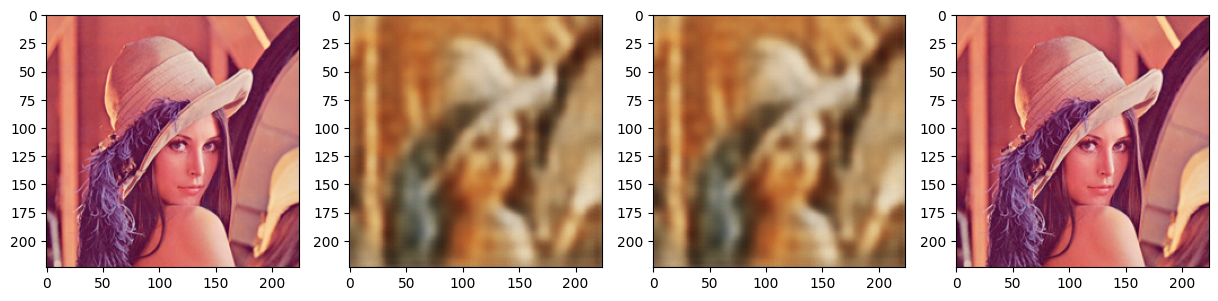

In [4]:
f, axarr = plt.subplots(1, 4, figsize=(15, 15))

files = [b8_files["aerobic"][0][0], b8_files["aerobic"][0][2], b8_files["aerobic"][0][2], b8_files["jpeg"][0][2]]
files = [os.path.join("..", file) for file in files]

for i in range(len(files)):
    axarr[i].imshow(Image.open(files[i]))

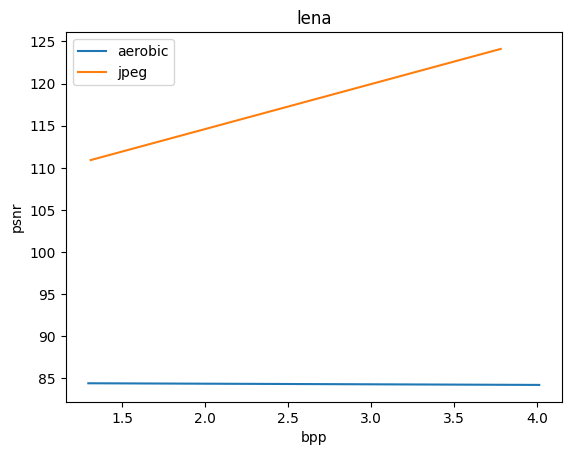

In [5]:
image_name = "lena"
plt.plot(bpp[image_name]["aerobic"], psnr[image_name]["aerobic"], label = "aerobic")
plt.plot(bpp[image_name]["jpeg"], psnr[image_name]["jpeg"], label = "jpeg")
plt.title(image_name)
plt.xlabel("bpp")
plt.ylabel("psnr")
plt.legend()
plt.show()

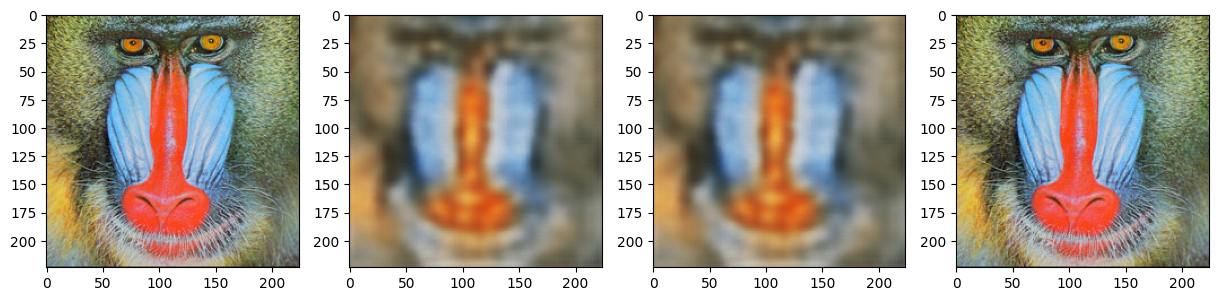

In [6]:
f, axarr = plt.subplots(1, 4, figsize=(15, 15))

files = [b8_files["aerobic"][1][0], b8_files["aerobic"][1][2], b8_files["aerobic"][1][2], b8_files["jpeg"][1][2]]
files = [os.path.join("..", file) for file in files]

for i in range(len(files)):
    axarr[i].imshow(Image.open(files[i]))

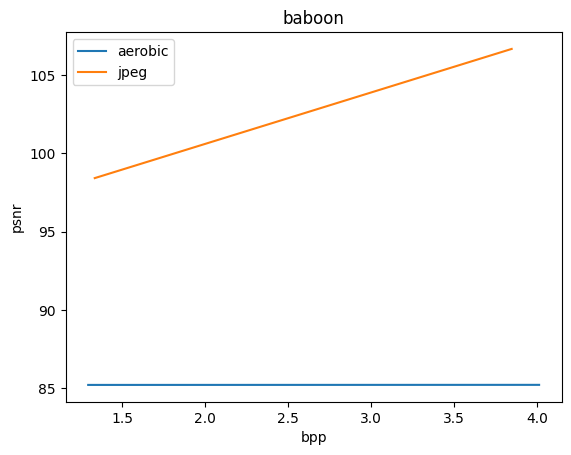

In [7]:
image_name = "baboon"
plt.plot(bpp[image_name]["aerobic"], psnr[image_name]["aerobic"], label = "aerobic")
plt.plot(bpp[image_name]["jpeg"], psnr[image_name]["jpeg"], label = "jpeg")
plt.title(image_name)
plt.xlabel("bpp")
plt.ylabel("psnr")
plt.legend()
plt.show()

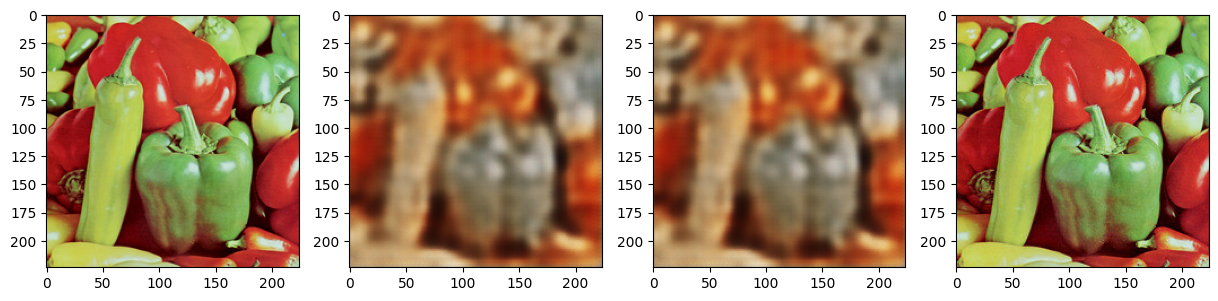

In [8]:
f, axarr = plt.subplots(1, 4, figsize=(15, 15))

files = [b8_files["aerobic"][2][0], b8_files["aerobic"][2][2], b8_files["aerobic"][2][2], b8_files["jpeg"][2][2]]
files = [os.path.join("..", file) for file in files]

for i in range(len(files)):
    axarr[i].imshow(Image.open(files[i]))

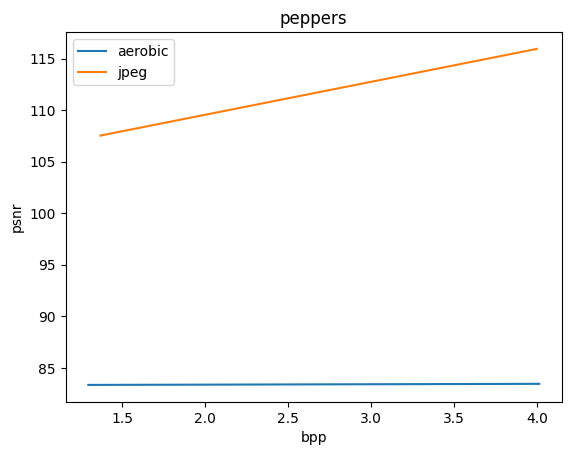

In [9]:
image_name = "peppers"
plt.plot(bpp[image_name]["aerobic"], psnr[image_name]["aerobic"], label = "aerobic")
plt.plot(bpp[image_name]["jpeg"], psnr[image_name]["jpeg"], label = "jpeg")
plt.title(image_name)
plt.xlabel("bpp")
plt.ylabel("psnr")
plt.legend()
plt.show()